# SIE LENS 
Analysing the images' properties in the case of SIE lens using GLAFIC.

~ Saif 01/03/22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from gw_lens_dir.overlap_lensing_sie_twoimages import overlap_sie
from gw_lens_dir.L_unlensed import Lunlensed
pd.set_option('display.float_format', lambda x: '%.3e' % x)

#from pycbc.filter import match
# plt.rc('xtick', labelsize=15) 
# plt.rc('ytick', labelsize=15)
# plt.rcParams.update({'font.size': 14})
# plt.rc('legend', fontsize=20)

/Users/saifali/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter, NullFormatter
from matplotlib.ticker import MaxNLocator
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.size'] = 20
mpl.rcParams['legend.handlelength'] = 3.0
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 1.0
mpl.rcParams['xtick.major.size'] = 5.0
mpl.rcParams['xtick.minor.size'] = 3.0
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 1.0
mpl.rcParams['ytick.major.size'] = 5.0
mpl.rcParams['ytick.minor.size'] = 3.0
mpl.rcParams['ytick.right'] = True

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = '\\usepackage{sfmath}'

In [3]:
# CHECKING PURPOSE

solar_mass = 4.92624076 * 10**-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 10**17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

def my_lin(lb, ub, steps, spacing = 3):
    span = (ub-lb)
    dx = 1.0 / (steps-1)
    return np.array([lb + (i * dx) ** spacing * span for i in range(steps)])

radius_range = np.linspace(0.29e-4, 1.98e-4, 10)

initial_params_source = {
    'theta_s_source' : 0.0, 
    'phi_s_source' : 0.0, 
    'theta_l_source' : 0.0, 
    'phi_l_source' : 0.0, 
    'mcz_source' : 18.79 * solar_mass, 
    'dist_source': 1.58 * giga_parsec, 
    'eta_source' : 0.25, 
    't0' : 0.0, 
    'phi_0' : 0.0,
    'radius': radius_range[9]
}

initial_params_template = {
    'theta_s_temp' : 0.0, 
    'phi_s_temp' : 0.0, 
    'theta_l_temp' : 0.0, 
    'phi_l_temp' : 0.0, 
    'mcz_temp' : 18.79 * solar_mass, 
    'dist_temp': 1.58 * giga_parsec, 
    'eta_temp' : 0.25, 
    #'tc' : 0.0, 
    #'phi_c' : 0.0,
}

# overlap_sie_init = overlap_sie(initial_params_source, initial_params_template)
#print(overlap_sie_init.limit(initial_params_source, initial_params_template))
# F = overlap_sie_init.F_source_sie(20)
# F

In [4]:
solar_mass = 4.92624076 * 10**-6 #[solar_mass] = sec
giga_parsec = 1.02927125 * 10**17 #[giga_parsec] = sec
year = 31557600 #[year] = sec

initial_params = {
    'theta_s' : 0.0, 
    'phi_s' : 0.0, 
    'theta_l' : 0.0, 
    'phi_l' : 0.0, 
    'mcz' : 20 * solar_mass, 
    'dist': 1.0 * giga_parsec, 
    'eta' : 0.25, 
    'tc' : 0.0, 
    'phi_c' : 0.0,
}

unlensed_init = Lunlensed(initial_params)
#h = unlensed_init.hI(np.arange(20, 101.846, 1))
tf = unlensed_init.get_tc()
tf

(-0.006328271806889197, 95.68450797230712)

In [5]:
t_f_cut = -0.006328271806889197
t_f_min = -1.4014105591470913
-t_f_min + t_f_cut

1.3950822873402022

In [6]:
f = np.linspace(20, 102, 300)
amp = np.zeros_like(f, dtype = np.complex128)
integrand_1 = np.zeros_like(f, dtype = np.complex128)
integrand_2 = np.zeros_like(f, dtype = np.complex128)
integrand_3 = np.zeros_like(f, dtype = np.complex128)
signal_source = np.zeros_like(f, dtype = np.complex128)
signal_template = np.zeros_like(f, dtype = np.complex128)

for i in range(len(f)):
    #amp[i] = overlap_sie_init.F_source_sie(f[i])
    integrand_1[i] = overlap_sie_init.integrand_1(f[i], 0., 0.)
    integrand_2[i] = overlap_sie_init.integrand_2(f[i], 0., 0.)
    integrand_3[i] = overlap_sie_init.integrand_3(f[i], 0., 0.)
    signal_source[i] = overlap_sie_init.signal_source(f[i], 0., 0.)
    signal_template[i] = overlap_sie_init.signal_temp(f[i], 0., 0.)
    
plt.figure(figsize = (10, 8))
#plt.loglog(f, np.abs(amp))
ax1 = plt.subplot(211)
ax1.plot(f, np.abs(integrand_1), label = 'int 1')
ax1.plot(f, np.abs(integrand_2), label = 'int 2')
ax1.plot(f, np.abs(integrand_3), label = 'int 3')
ax1.legend()

ax2 = plt.subplot(212)
ax2.plot(f, np.abs(signal_source), label = 'lensed')
ax2.plot(f, np.abs(signal_template), label = 'unlensed')
ax2.legend()

NameError: name 'overlap_sie_init' is not defined

In [7]:
overlap_sie_init = overlap_sie(initial_params_source, initial_params_template)
overlap = overlap_sie_init.overlap(x = (0., 0.))
overlap

IndexError: index 0 is out of bounds for axis 0 with size 0

In [8]:
datadirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/data/"
plotdirName = "/Users/saifali/Desktop/gwlensing/plots/"

In [9]:
data_einstein = '/Users/saifali/Desktop/gwlensing/SIE_glafic/out_ein2.dat'
output_einstein = np.loadtxt(data_einstein)
einstein_radius = output_einstein[-2]
einstein_radius

0.0003977795

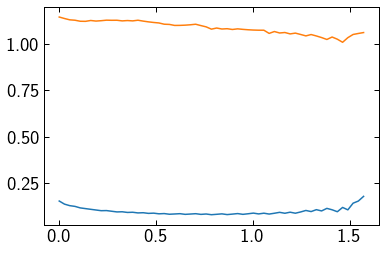

In [10]:
df_1 = pd.read_csv(datadirName + "radial_distance_caustics_e=0.2_1.csv")
df_2 = pd.read_csv(datadirName + "radial_distance_caustics_e=0.2.csv")
frames = [df_1, df_2]
df = pd.concat(frames)
#df_1, df_2, df
plt.plot(np.array(df['theta']) * (np.pi / 180), np.array(df['caustic_in']) / einstein_radius)
plt.plot(np.array(df['theta']) * (np.pi / 180), np.array(df['caustic_out']) / einstein_radius)

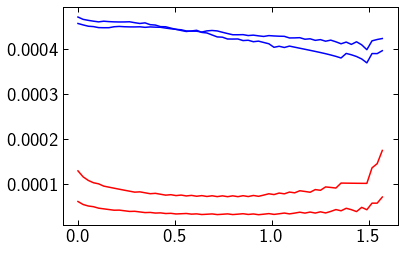

In [11]:
df = pd.read_csv(datadirName + "radial_distance_caustics_e=0.2_final.csv")
df_2 = pd.read_csv(datadirName + "radial_distance_caustics_e=0.4_final.csv")
plt.plot(np.array(df['theta']) * (np.pi / 180), np.array(df['caustic_in']), color = 'red')
plt.plot(np.array(df['theta']) * (np.pi / 180), np.array(df['caustic_out']), color = 'blue')
plt.plot(np.array(df_2['theta']) * (np.pi / 180), np.array(df_2['caustic_in']), color = 'red')
plt.plot(np.array(df_2['theta']) * (np.pi / 180), np.array(df_2['caustic_out']), color = 'blue')

In [12]:
# FOR SIGMA = 4 km/s

einstein_rad_e_2 = 0.0001767909
einstein_rad_e_4 = 0.0001531054
#mass_inside_einstein_rad = 11280.541428571429 sol_mass
data_einstein = '/Users/saifali/Desktop/gwlensing/SIE_glafic/out_ein2.dat'
output_einstein = np.loadtxt(data_einstein)
einstein_radius = output_einstein[-2]
print(einstein_radius)

# [MASS INSIDE EINSTEIN] = SOLAR MASS / h

mass_inside_einstein = output_einstein[-1]
print(mass_inside_einstein / 0.7)

theta = np.array([0, 30, 45, 60, 90])
fileName = ["radial_distance_caustics_0.csv",
            "radial_distance_caustics_30.csv",
           "radial_distance_caustics_45.csv",
            "radial_distance_caustics_60.csv",
           "radial_distance_caustics_90.csv"]

caustic_in = []
caustic_out = []

for i in range(len(fileName)):
    df_radial_distance = pd.read_csv(datadirName + fileName[i])
    df_get_radius_caustic_in = df_radial_distance.loc[df_radial_distance['images_num'] > 2.0]
    caustic_in.append(df_get_radius_caustic_in.iloc[-1]['radius'])
    df_get_radius_caustic_out = df_radial_distance.loc[df_radial_distance['images_num'] > 1.0]
    caustic_out.append(df_get_radius_caustic_out.iloc[-1]['radius'])
    
df_caustic_radii = pd.DataFrame(columns=('0', '30', '45', '60', '90'), index=('r_caustic_in', 'r_caustic_out'))
df_caustic_radii.loc['r_caustic_in'] = caustic_in
df_caustic_radii.loc['r_caustic_out'] = caustic_out
df_caustic_radii

0.0003977795
57107.74285714286


,0,30,45,60,90
r_caustic_in,2.653e-05,1.404e-05,1.407e-05,1.548e-05,3.095e-05
r_caustic_out,2.023e-04,1.940e-04,1.907e-04,1.879e-04,1.868e-04


In [ ]:
theta = np.array([0, 30, 45, 60, 90])
fileName = ["radial_distance_caustics_e=0.4_0.csv",
            "radial_distance_caustics_e=0.4_30.csv",
           "radial_distance_caustics_e=0.4_45.csv",
            "radial_distance_caustics_e=0.4_60.csv",
           "radial_distance_caustics_e=0.4_90.csv"]

caustic_in_e_4 = []
caustic_out_e_4 = []

for i in range(len(fileName)):
    df_radial_distance = pd.read_csv(datadirName + fileName[i])
    df_get_radius_caustic_in_e_4 = df_radial_distance.loc[df_radial_distance['images_num'] > 2.0]
    caustic_in_e_4.append(df_get_radius_caustic_in_e_4.iloc[-1]['radius'])
    df_get_radius_caustic_out_e_4 = df_radial_distance.loc[df_radial_distance['images_num'] > 1.0]
    caustic_out_e_4.append(df_get_radius_caustic_out_e_4.iloc[-1]['radius'])
df_caustic_radii = pd.DataFrame(columns=('0', '30', '45', '60', '90'), index=('r_caustic_in', 'r_caustic_out'))
df_caustic_radii.loc['r_caustic_in'] = caustic_in_e_4
df_caustic_radii.loc['r_caustic_out'] = caustic_out_e_4
df_caustic_radii

In [ ]:
einstein_rad_e_6 = 1.25010e-04 
theta = np.array([0, 30, 45, 60, 90])
fileName = ["radial_distance_caustics_e=0.6_0.csv",
            "radial_distance_caustics_e=0.6_30.csv",
           "radial_distance_caustics_e=0.6_45.csv",
            "radial_distance_caustics_e=0.6_60.csv",
           "radial_distance_caustics_e=0.6_90.csv"]

caustic_in_e_6 = []
caustic_out_e_6 = []

for i in range(len(fileName)):
    df_radial_distance = pd.read_csv(datadirName + fileName[i])
    df_get_radius_caustic_in_e_6 = df_radial_distance.loc[df_radial_distance['images_num'] > 2.0]
    caustic_in_e_6.append(df_get_radius_caustic_in_e_6.iloc[-1]['radius'])
    df_get_radius_caustic_out_e_6 = df_radial_distance.loc[df_radial_distance['images_num'] > 1.0]
    caustic_out_e_6.append(df_get_radius_caustic_out_e_6.iloc[-1]['radius'])
df_caustic_radii = pd.DataFrame(columns=('0', '30', '45', '60', '90'), index=('r_caustic_in', 'r_caustic_out'))
df_caustic_radii.loc['r_caustic_in'] = caustic_in_e_6
df_caustic_radii.loc['r_caustic_out'] = caustic_out_e_6
df_caustic_radii

In [ ]:
plt.figure(figsize = (10, 8))


plt.plot(np.pi * theta / 180, np.array(caustic_out) / einstein_rad_e_2, c = 'r', label = r"$e = 0.2$")
plt.plot(np.pi * theta / 180, np.array(caustic_in) / einstein_rad_e_2, '--', c = 'r')
plt.xlabel(r'$\theta$ [rad]', fontsize = 22)
plt.ylabel(r'$r_{caustic}$', fontsize = 22)
plt.legend()
#plt.ylim(0, 2)
plt.text(0.52, 1.14, 'ONE IMAGE REGIME', color = 'r', fontsize = 12)
plt.text(0.52, 0.7, 'TWO IMAGES REGIME', color = 'r', fontsize = 12)
plt.text(0.52, 0.02, 'FOUR IMAGES REGIME', color = 'r', fontsize = 12)

plt.plot(np.pi * theta / 180, np.array(caustic_out_e_4) / einstein_rad_e_4, c = 'g', label = r"$e = 0.4$")
plt.plot(np.pi * theta / 180, np.array(caustic_in_e_4) / einstein_rad_e_4, '--', c = 'g')
plt.xlabel(r'$\theta$ [rad]', fontsize = 22)
plt.ylabel(r'$r_{caustic}$', fontsize = 22)
plt.text(0.52, 1.3, 'ONE IMAGE REGIME', color = 'g', fontsize = 12)
plt.text(0.52, 0.6, 'TWO IMAGES REGIME', color = 'g', fontsize = 12)
plt.text(0.52, 0.14, 'FOUR IMAGES REGIME', color = 'g', fontsize = 12)
plt.legend()
#plt.ylim(0, 2)

plt.plot(np.pi * theta / 180, np.array(caustic_out_e_6) / einstein_rad_e_6, c = 'b', label = r"$e = 0.6$")
plt.plot(np.pi * theta / 180, np.array(caustic_in_e_6) / einstein_rad_e_6, '--', c = 'b')
plt.xlabel(r'$\theta$ [rad]', fontsize = 22)
plt.ylabel(r'$r_{caustic}$', fontsize = 22)
plt.text(0.52, 1.6, 'ONE IMAGE REGIME', color = 'b', fontsize = 12)
plt.text(0.52, 0.8, 'TWO IMAGES REGIME', color = 'b', fontsize = 12)
plt.text(0.52, 0.3, 'FOUR IMAGES REGIME', color = 'b', fontsize = 12)
plt.legend()y


plt.ylim(0, 2)
#plt.savefig(plotdirName + "casutic_radius.pdf")

************************************************************************************************************************

************************************************************************************************************************

In [19]:
def dataframe_sorted_two_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0] for i in range(df_unsorted.shape[0])]

    sorted_arr = np.zeros(df_unsorted.shape)
    
    for i_row in range(df_unsorted.shape[0]):
        
        #df_sorted = pd.DataFrame(columns=('source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'))
        old_td_arr = np.array(df_unsorted.loc[i_row][-2:])
        #print(old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(new_td_arr)
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:3])
        #print(old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]]])
        #print(new_mu_arr)
        
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_td_arr[0]
        sorted_arr[i_row][4] = new_td_arr[1]
        
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_y', 'mu_1', 'mu_2', 'td_1', 'td_2'])
    
    return df_sorted

## TWO IMAGES CASE

In [14]:
theta_E_sis = 1.976582e-04 # einstein radius for sis of sigma = 4 km/s

In [15]:
df_theta_0 = pd.read_csv(datadirName + "flux_twoimages_theta_0.0_sigma=4.csv")
df_theta_0['source_x'] = df_theta_0['source_x'] 
df_theta_0['td_2'] = df_theta_0['td_2'] * 86400 
df_theta_0['I'] = np.abs(df_theta_0['mu_2']) / np.abs(df_theta_0['mu_1'])
df_theta_0.to_csv(datadirName + "flux_twoimages_theta_0_sigma=4_sorted.csv", index = False)
#df_theta_0['low ft_d lim'] = df_theta_0['td_2'] * 20
# df_theta_0

In [16]:
df_theta_30 = pd.read_csv(datadirName + "flux_twoimages_theta_30.0_sigma=4.csv")
df_theta_30 = dataframe_sorted_two_images(df_theta_30)
df_theta_30['source_x'] = df_theta_30['source_x'] 
df_theta_30['td_2'] = df_theta_30['td_2'] * 86400 
df_theta_30['I'] = np.abs(df_theta_30['mu_2']) / np.abs(df_theta_30['mu_1'])
df_theta_30.to_csv(datadirName + "flux_twoimages_theta_30_sigma=4_sorted.csv", index = False)
#df_theta_30

In [17]:
df_theta_45 = pd.read_csv(datadirName + "flux_twoimages_theta_45.0_sigma=4.csv")
df_theta_45 = dataframe_sorted_two_images(df_theta_45)
df_theta_45['source_x'] = df_theta_45['source_x'] 
df_theta_45['td_2'] = df_theta_45['td_2'] * 86400 
df_theta_45['I'] = np.abs(df_theta_45['mu_2']) / np.abs(df_theta_45['mu_1'])
df_theta_45.to_csv(datadirName + "flux_twoimages_theta_45_sigma=4_sorted.csv", index = False)
# df_theta_45

In [18]:
df_theta_60 = pd.read_csv(datadirName + "flux_twoimages_theta_60.0_sigma=4.csv")
df_theta_60 = dataframe_sorted_two_images(df_theta_60)
df_theta_60['source_x'] = df_theta_60['source_x'] 
df_theta_60['td_2'] = df_theta_60['td_2'] * 86400 
df_theta_60['I'] = np.abs(df_theta_60['mu_2']) / np.abs(df_theta_60['mu_1'])
df_theta_60.to_csv(datadirName + "flux_twoimages_theta_60_sigma=4_sorted.csv", index = False)
#df_theta_60

In [20]:
df_theta_90 = pd.read_csv(datadirName + "flux_twoimages_theta_90.0_sigma=4.csv")
df_theta_90 = dataframe_sorted_two_images(df_theta_90)
df_theta_90['source_y'] = df_theta_90['source_y']
df_theta_90['td_2'] = df_theta_90['td_2'] * 86400 
df_theta_90['I'] = np.abs(df_theta_90['mu_2']) / np.abs(df_theta_90['mu_1'])
df_theta_90.to_csv(datadirName + "flux_twoimages_theta_90_sigma=4_sorted.csv", index = False)
# df_theta_90

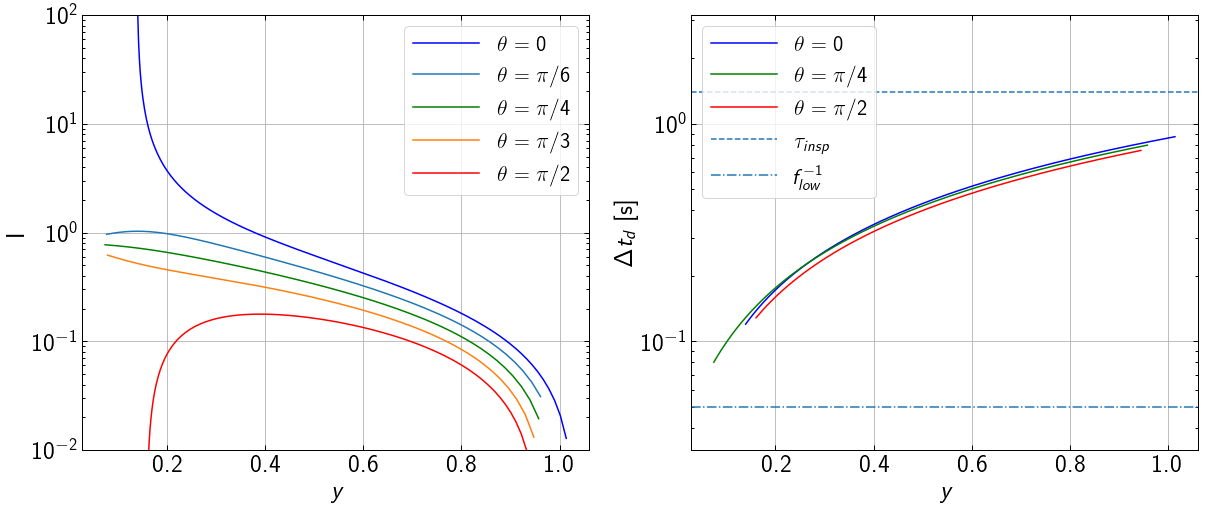

In [24]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))
axs[0].semilogy(np.array(df_theta_0['source_x']) / theta_E_sis, np.array(df_theta_0['I']), label = r'$\theta = 0$', color = 'blue')
axs[0].semilogy(np.array(df_theta_30['source_x']) / theta_E_sis, np.array(df_theta_30['I']), label = r'$\theta = \pi / 6$')
axs[0].semilogy(np.array(df_theta_45['source_x']) / theta_E_sis, np.array(df_theta_45['I']), label = r'$\theta = \pi / 4$', color = 'green')
axs[0].semilogy(np.array(df_theta_60['source_x']) / theta_E_sis, np.array(df_theta_60['I']), label = r'$\theta = \pi / 3$')
axs[0].semilogy(np.array(df_theta_90['source_y']) / theta_E_sis, np.array(df_theta_90['I']), label = r'$\theta = \pi / 2$', color = 'red')
axs[0].set_ylabel('I', fontsize = 25)
axs[0].set_xlabel(r'$y$', fontsize = 25)
axs[0].set_ylim(10**-2, 10**2)
axs[0].grid()
axs[0].tick_params(axis='both', which='both', direction='in', labelsize=25)
axs[0].legend(loc = 'best', fontsize = 22)

axs[1].semilogy(np.array(df_theta_0['source_x']) / theta_E_sis, np.array(df_theta_0['td_2']), label = r'$\theta = 0$', color = 'blue')
# axs[1].semilogy(np.array(df_theta_30['source_x']) / theta_E_sis, np.array(df_theta_30['td_2']), label = r'$\theta = \pi / 6$', alpha = 0.6)
axs[1].semilogy(np.array(df_theta_45['source_x']) / theta_E_sis, np.array(df_theta_45['td_2']), label = r'$\theta = \pi / 4$', color = 'green')
# axs[1].semilogy(np.array(df_theta_60['source_x']) / theta_E_sis, np.array(df_theta_60['td_2']), label = r'$\theta = \pi / 3$', alpha = 0.2)
axs[1].semilogy(np.array(df_theta_90['source_y']) / theta_E_sis, np.array(df_theta_90['td_2']), label = r'$\theta = \pi / 2$', color = 'red')
axs[1].axhline(y = 1.40, ls = '--', label = r'$\tau_{insp}$')
axs[1].axhline(y = 0.05, ls = '-.', label = r'$f_{low}^{-1}$')
axs[1].set_ylim(10**-1.5, 10**0.5)
axs[1].set_ylabel(r'$\Delta t_d$ [s]', fontsize = 25)
axs[1].set_xlabel(r'$y$', fontsize = 25)
axs[1].grid()
axs[1].legend(loc = 'best', fontsize = 22)
axs[1].tick_params(axis='both', which='both', direction='in', labelsize=25)


# plt.savefig(plotdirName + "lensparam_vs_y_twoimages_sigma_4.pdf", bbox_inches = 'tight', dpi = 200)

************************************************************************************************************************

************************************************************************************************************************

## FOUR IMAGES CASE

In [25]:
def dataframe_sorted_four_images(dataframe):
    
    df_unsorted = dataframe
    
    old_td_ind = [[0, 1, 2, 3] for i in range(df_unsorted.shape[0])]
    new_td_ind = [[0, 0, 0, 0] for i in range(df_unsorted.shape[0])]
    
    sorted_arr = np.zeros(df_unsorted.shape)
    #print(sorted_arr)
    for i_row in range(df_unsorted.shape[0]):
     
        old_td_arr = np.array(df_unsorted.loc[i_row][-4:])
        #print(i_row, old_td_arr)
        new_td_arr = np.sort(old_td_arr)
        #print(i_row, new_td_arr)
       
        
        new_td_ind[i_row][0] = np.where(new_td_arr[0] == old_td_arr)[0][0]
        new_td_ind[i_row][1] = np.where(new_td_arr[1] == old_td_arr)[0][0]
        new_td_ind[i_row][2] = np.where(new_td_arr[2] == old_td_arr)[0][0]
        new_td_ind[i_row][3] = np.where(new_td_arr[3] == old_td_arr)[0][0]
        
        #print(new_td_ind[i_row], set(new_td_ind[i_row]))
        if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            dup_ind = [idx for idx, item in enumerate(new_td_ind[i_row]) if item in new_td_ind[i_row][:idx]]
            #print(dup_ind, new_td_ind[i_row][dup_ind[0]])
            new_num = new_td_ind[i_row][dup_ind[0]] + 1
            if new_num not in new_td_ind[i_row]:
                new_td_ind[i_row][dup_ind[0]] += 1
            else:
                new_td_ind[i_row][dup_ind[0]] += 2
            
        #if len(new_td_ind[i_row]) != len(set(new_td_ind[i_row])):
            #uniq_arr, dup_ind = np.unique(new_td_ind[i_row], return_index = True)
            #print(uniq_arr, dup_ind)
            #new_td_ind[i_row][dup_ind[-1]] += 1

        #print(new_td_ind[i_row])
        
        old_mu_arr = np.array(df_unsorted.loc[i_row][1:5])
        #print(i_row, old_mu_arr)
        new_mu_arr = np.array([old_mu_arr[new_td_ind[i_row][0]], old_mu_arr[new_td_ind[i_row][1]], old_mu_arr[new_td_ind[i_row][2]], 
                               old_mu_arr[new_td_ind[i_row][3]]])
        #print(new_mu_arr)
        #print('\n')
        sorted_arr[i_row][0] = df_unsorted.loc[i_row][0]
        sorted_arr[i_row][1] = new_mu_arr[0]
        sorted_arr[i_row][2] = new_mu_arr[1]
        sorted_arr[i_row][3] = new_mu_arr[2]
        sorted_arr[i_row][4] = new_mu_arr[3]
        sorted_arr[i_row][5] = new_td_arr[0]
        sorted_arr[i_row][6] = new_td_arr[1]
        sorted_arr[i_row][7] = new_td_arr[2]
        sorted_arr[i_row][8] = new_td_arr[3]
    #print(sorted_arr)   
    df_sorted = pd.DataFrame(sorted_arr, columns = ['source_x', 'mu_1', 'mu_2', 'mu_3', 'mu_4', 'td_1', 'td_2', 'td_3', 'td_4'])
    
    return df_sorted

In [26]:
theta_E_sis_sigma_6 = 4.447310e-04 # einstein radius for sis of sigma = 6 km/s

In [27]:
df_theta_0_four = pd.read_csv(datadirName + "flux_fourimages_theta_0.0_sigma=6.csv")
df_theta_0_four = dataframe_sorted_four_images(df_theta_0_four)
df_theta_0_four['source_x'] = df_theta_0_four['source_x'] 
df_theta_0_four['td_2'] = df_theta_0_four['td_2'] * 86400 
df_theta_0_four['td_3'] = df_theta_0_four['td_3'] * 86400 
df_theta_0_four['td_4'] = df_theta_0_four['td_4'] * 86400 
df_theta_0_four['I_2'] = np.abs(df_theta_0_four['mu_2']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_3'] = np.abs(df_theta_0_four['mu_3']) / np.abs(df_theta_0_four['mu_1'])
df_theta_0_four['I_4'] = np.abs(df_theta_0_four['mu_4']) / np.abs(df_theta_0_four['mu_1'])
#df_theta_0_four

In [28]:
df_theta_45_four = pd.read_csv(datadirName + "flux_fourimages_theta_45.0_sigma=6.csv")
df_theta_45_four = dataframe_sorted_four_images(df_theta_45_four)
df_theta_45_four['source_x'] = df_theta_45_four['source_x'] 
df_theta_45_four['td_2'] = df_theta_45_four['td_2'] * 86400 
df_theta_45_four['td_3'] = df_theta_45_four['td_3'] * 86400 
df_theta_45_four['td_4'] = df_theta_45_four['td_4'] * 86400 
df_theta_45_four['I_2'] = np.abs(df_theta_45_four['mu_2']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_3'] = np.abs(df_theta_45_four['mu_3']) / np.abs(df_theta_45_four['mu_1'])
df_theta_45_four['I_4'] = np.abs(df_theta_45_four['mu_4']) / np.abs(df_theta_45_four['mu_1'])
# df_theta_45_four

In [32]:
df_theta_90_four = pd.read_csv(datadirName + "flux_fourimages_theta_90.0_sigma=6.csv")
df_theta_90_four = dataframe_sorted_four_images(df_theta_90_four)
df_theta_90_four['source_x'] = df_theta_90_four['source_x'] 
df_theta_90_four['td_2'] = df_theta_90_four['td_2'] * 86400 
df_theta_90_four['td_3'] = df_theta_90_four['td_3'] * 86400 
df_theta_90_four['td_4'] = df_theta_90_four['td_4'] * 86400 
df_theta_90_four['I_2'] = np.abs(df_theta_90_four['mu_2']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_3'] = np.abs(df_theta_90_four['mu_3']) / np.abs(df_theta_90_four['mu_1'])
df_theta_90_four['I_4'] = np.abs(df_theta_90_four['mu_4']) / np.abs(df_theta_90_four['mu_1'])
# df_theta_90_four

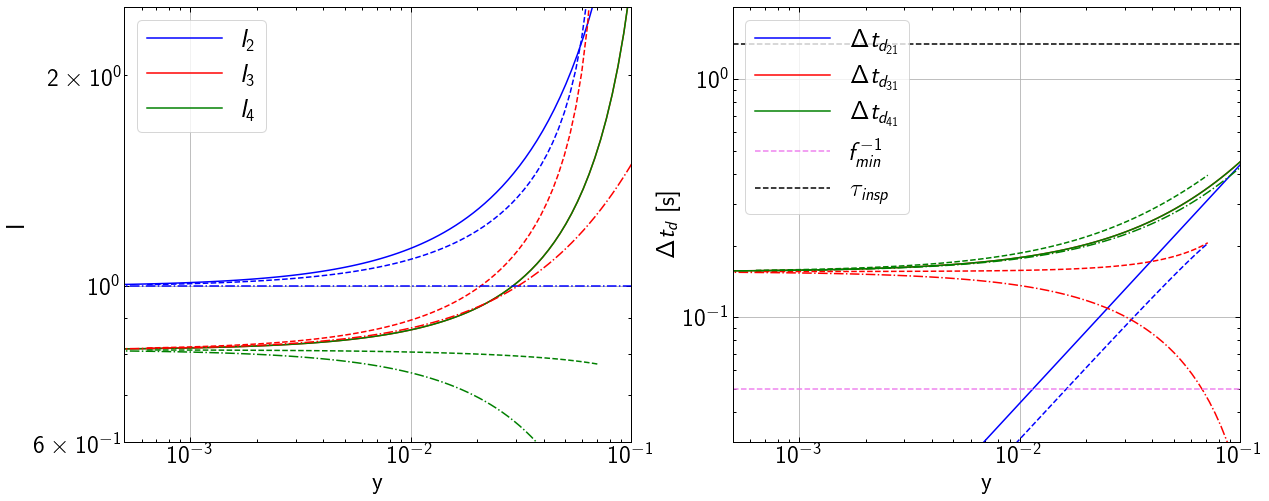

In [35]:
import matplotlib
matplotlib.rc('font', size=25)

fig, axs = plt.subplots(1, 2, figsize = (20,8))

axs[0].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['I_2']), label = r'$I_2$', color = 'blue')
axs[0].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['I_3']), label = r'$I_3$', color = 'red')
axs[0].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['I_4']), label = r'$I_4$', color = 'green')
axs[0].set_xlabel('y', fontsize = 25)
axs[0].set_ylabel('I', fontsize = 25)
axs[0].grid()
axs[0].set_ylim(0.6, 2.5)
axs[0].set_xlim(5e-4, 1e-1)
axs[0].tick_params(axis='both', which='major', labelsize=25)

axs[0].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['I_2']), ls = '--', color = 'blue')
axs[0].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['I_3']), ls = '--', color = 'red')
axs[0].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['I_4']), ls = '--', color = 'green')
axs[0].set_xlabel('y', fontsize = 25)

axs[0].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['I_2']), ls = '-.', color = 'blue')
axs[0].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['I_3']), ls = '-.', color = 'red')
axs[0].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['I_4']), ls = '-.', color = 'green')
axs[0].legend(fontsize=25)


axs[1].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['td_2']), label = r'$\Delta t_{d_{21}}$', color = 'blue')
axs[1].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['td_3']), label = r'$\Delta t_{d_{31}}$', color = 'red')
axs[1].loglog(np.array(df_theta_0_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_0_four['td_4']), label = r'$\Delta t_{d_{41}}$', color = 'green')
axs[1].set_xlabel('y', fontsize = 25)
axs[1].set_ylabel(r'$\Delta t_d$ [s]', fontsize = 25)
axs[1].grid()
axs[1].set_ylim(3e-2, 2.0)
axs[1].set_xlim(5e-4, 1e-1)
axs[1].tick_params(axis='both', which='major', labelsize=25)

axs[1].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['td_2']), color = 'blue', ls = '--')
axs[1].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['td_3']), color = 'red', ls = '--')
axs[1].loglog(np.array(df_theta_45_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_45_four['td_4']), color = 'green', ls = '--')


# axs[0].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['td_2']))
axs[1].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['td_3']), color = 'red', ls = '-.')
axs[1].loglog(np.array(df_theta_90_four['source_x']) / theta_E_sis_sigma_6, np.array(df_theta_90_four['td_4']), color = 'green', ls = '-.')
axs[1].axhline(y = 0.05, ls = '--', color = 'violet', label = r'$f_{min}^{-1}$')
axs[1].axhline(y = 1.40, ls = '--', color = 'black', label = r'$\tau_{insp}$')
axs[1].legend(fontsize=25)

# plt.savefig(plotdirName + 'lensparam_vs_y_fourimages_sigma_6.pdf', dpi = 200, bbox_inches = 'tight')

## READING THE TIME DELAY SURFACE 

In [49]:
from astropy.io import fits
fits_time_delay = fits.open('/Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits')
fits_time_delay.info()

Filename: /Users/saifali/Desktop/gwlensing/SIE_glafic/out_td_point.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      17   (10, 10)   float32   


In [50]:
hdu_time_delay = fits_time_delay[0]
time_dalay_data = hdu_time_delay.data

In [51]:
x = np.arange(-5, 5, 0.2)
y = np.arange(-5, 5, 0.2)
xx, yy = np.meshgrid(x, y)

TypeError: Shape of x does not match that of z: found (50, 50) instead of (10, 10).

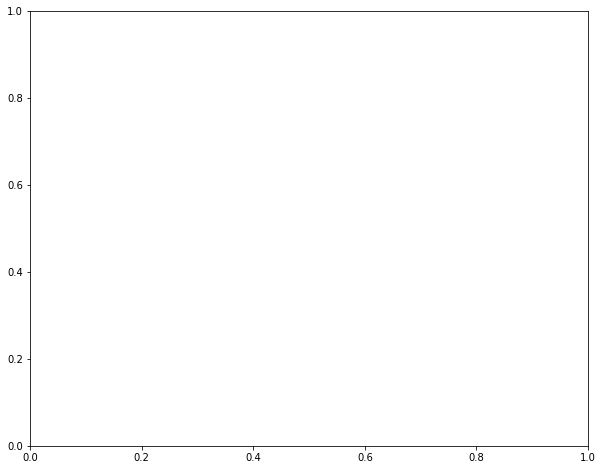

In [52]:
fig, ax = plt.subplots(figsize = (10, 8))
time_delay_surf = ax.contour(xx, yy, time_dalay_data, 100)
ax.plot(2.04880, 0, marker = 'x', label = 'td = 0')
ax.plot(-2.48800e-01, 0, marker = 'x', label = 'td = 48.22')
#plt.clabel(time_delay_surf, fontsize = 8)
#plt.title('x = 0.9, y = 0')
plt.legend()

## MISMATCHES FOR TWO IMAGES CASE

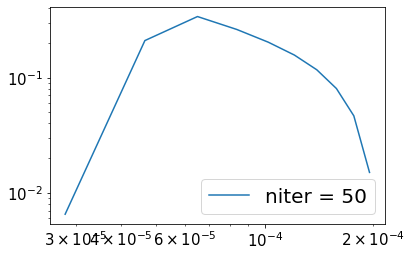

In [84]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df_niter_35 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=35.csv")
#df_niter_50 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=50.csv")
df_leftend_0 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=50_leftend_leftshift.csv")
#df_niter_80 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=80.csv")
#plt.loglog(np.array(df_niter_35['source_x']), 1 - np.array(df_niter_35['overlap']), label = 'niter = 35')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 50')
plt.loglog(np.array(df_leftend_0['source_x']), 1 - np.array(df_leftend_0['overlap']), label = 'niter = 50')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 80')
plt.legend()

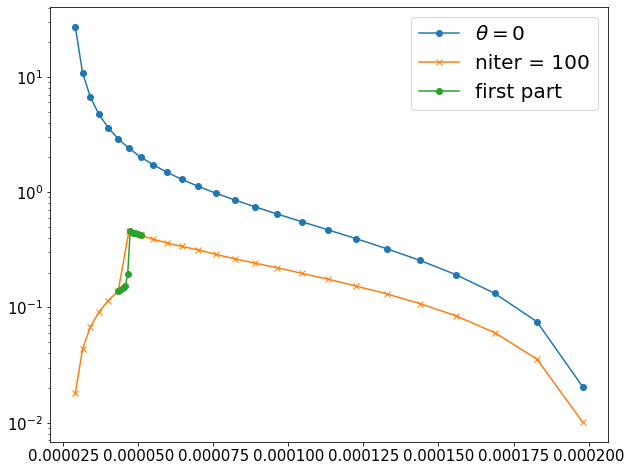

In [239]:
plt.figure(figsize = (10, 8))
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df_niter_35 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=35.csv")
#df_niter_50 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_trial_niter=50.csv")
df_leftend = pd.read_csv(datapath + "overlap_lensing_sie_theta_0_sigma=4.csv")
df_firstpart = pd.read_csv(datapath + "overlap_lensing_sie_theta_0_sigma=4_firstpart_niter=80.csv")
plt.semilogy(np.array(df_theta_0['source_x']), np.array(df_theta_0['I']), label = r'$\theta = 0$', marker = 'o')
#df_niter_80 = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=0_niter=80.csv")
#plt.loglog(np.array(df_niter_35['source_x']), 1 - np.array(df_niter_35['overlap']), label = 'niter = 35')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 50')
plt.semilogy(np.array(df_leftend['source_x']), 1 - np.array(df_leftend['overlap']), label = 'niter = 100', marker = 'x')
plt.semilogy(np.array(df_firstpart['source_x']), 1 - np.array(df_firstpart['overlap']), label = 'first part', marker = 'o')
#plt.loglog(np.array(df_leftend_0['source_x']), 1 - np.array(df_leftend_0['overlap']), label = 'niter = 50')
#plt.loglog(np.array(df_niter_50['source_x']), 1 - np.array(df_niter_50['overlap']), label = 'niter = 80')
plt.legend()
#df_firstpart

In [238]:
source_x_theta_0 = np.concatenate((np.array(df_mismatch_theta_0['source_x'][:5]), np.array(df_firstpart['source_x']), np.array(df_mismatch_theta_0['source_x'][8:]))) 
match_theta_0 = np.concatenate((np.array(df_mismatch_theta_0['overlap'][:5]), np.array(df_firstpart['overlap']), np.array(df_mismatch_theta_0['overlap'][8:]))) 
#np.c_[source_x_theta_0, match_theta_0]

In [156]:
df_theta_0 = pd.read_csv(datapath + "overlap_lensing_sie_theta_0_sigma=4.csv")
df_firstpart = pd.read_csv(datapath + "overlap_lensing_sie_theta_0_sigma=4_firstpart_niter=80.csv")
source_x = np.concatenate((np.array(df_theta_0['source_x']), np.array(df_firstpart['source_x'])))
match = np.concatenate((np.array(df_theta_0['overlap']), np.array(df_firstpart['overlap'])))
df_mod = pd.DataFrame({'source_x': source_x, 'overlap': match})

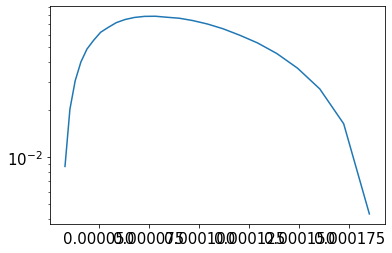

In [188]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
#df = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=90.csv")
df_trial = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=90_trial_cut_rightend.csv")
df_theta_90 = pd.read_csv(datapath + "overlap_lensing_sie_theta_90_sigma=4.csv")
#plt.loglog(np.array(df['source_x']), 1 - np.array(df['overlap']))
#plt.loglog(np.array(df_trial['source_x']), 1 - np.array(df_trial['overlap']))
plt.semilogy(np.array(df_theta_90['source_x']), 1 - np.array(df_theta_90['overlap']))

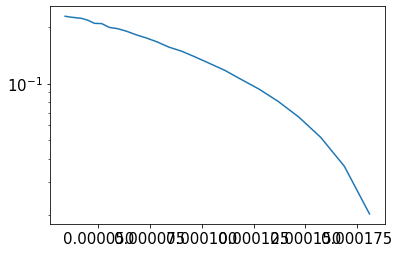

In [197]:
datapath = "/Users/saifali/Desktop/gwlensing/data/"
df_trial = pd.read_csv(datapath + "overlap_lensing_sie_sigma=4_theta=45_niter=80.csv")
df_theta_45 = pd.read_csv(datapath + "overlap_lensing_sie_theta_45_sigma=4.csv")
df_trial['source_x'] = df_trial['source_x'] * np.sqrt(2)
#plt.loglog(np.array(df['source_x']), 1 - np.array(df['overlap']))
#plt.loglog(np.array(df_trial['source_x']), 1 - np.array(df_trial['overlap']))
plt.semilogy(np.array(df_theta_45['source_x']), 1 - np.array(df_theta_45['overlap']))

In [200]:
df_mismatch_theta_0 = pd.read_csv(datapath + "overlap_lensing_sie_theta_0_sigma=4.csv")
df_mismatch_theta_45 = pd.read_csv(datapath + "overlap_lensing_sie_theta_45_sigma=4.csv")
df_mismatch_theta_90 = pd.read_csv(datapath + "overlap_lensing_sie_theta_90_sigma=4.csv")

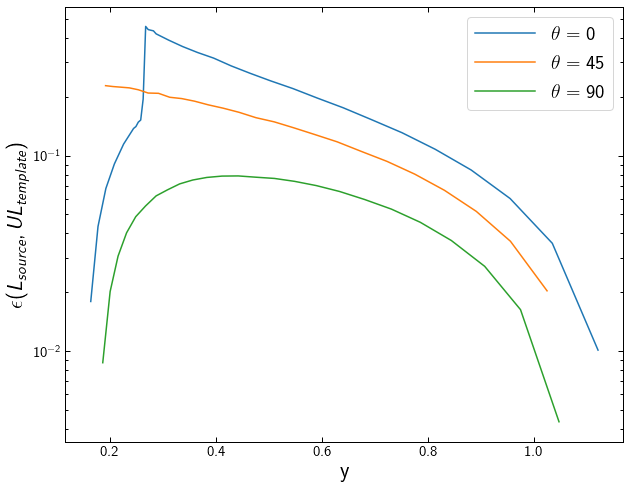

In [264]:
plt.figure(figsize = (10, 8))
ein_rad_4 = 1.767909e-04
plt.semilogy(source_x_theta_0 / ein_rad_4, 1 - match_theta_0, label = r'$\theta = 0$')
plt.semilogy(np.array(df_mismatch_theta_45['source_x']) / ein_rad_4, 1 - np.array(df_mismatch_theta_45['overlap']),label = r'$\theta = 45$')
plt.semilogy(np.array(df_mismatch_theta_90['source_x']) / ein_rad_4, 1 - np.array(df_mismatch_theta_90['overlap']),label = r'$\theta = 90$')
plt.ylabel(r'$\epsilon (L_{source}, UL_{template})$', fontsize = 22)
plt.xlabel(r'y', fontsize = 22)
plt.legend()
#plt.savefig(plotdirName + "mismatch_twoimgs_ultemp_sigma_4.pdf")

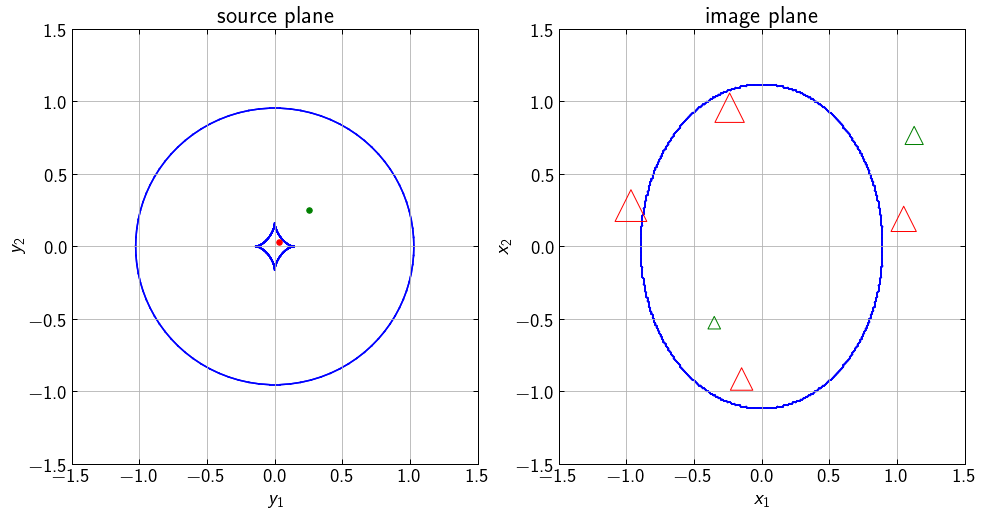

In [37]:
datPath = "/Users/saifali/Desktop/gwlensing/SIE_glafic/"
plotdirName = "/Users/saifali/Desktop/gwlensing/SIE_glafic/sie_plots/"
fig, axs = plt.subplots(1, 2, figsize = (16, 8))

rfile = datPath + 'out_crit_2imgs.dat'
data = np.loadtxt(rfile, comments = '#')

ix1 = data[: ,0]
iy1 = data[: ,1]
sx1 = data[: ,2]
sy1 = data[: ,3]
ix2 = data[: ,4]
iy2 = data[: ,5]
sx2 = data[: ,6]
sy2 = data[: ,7]

theta_E_sis = 1.976582e-04

rfile = datPath + 'out_point_2imgs.dat'
data = np.loadtxt(rfile, comments = '#')

sxx = data[0, 2]
syy = data[0, 3]
ixx = data[1: ,0]
iyy = data[1: ,1]


#edited
xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5


axs[1].plot([ix1 / theta_E_sis, ix2 / theta_E_sis], [iy1 / theta_E_sis, iy2 / theta_E_sis], '-', color = 'blue', zorder = 1)
axs[1].scatter(ixx / theta_E_sis, iyy / theta_E_sis, s = [330.4, 158.1], marker = '^', color = 'green', zorder = 2, facecolors='none')
axs[1].set_xlim([xmin, xmax])
axs[1].set_ylim([ymin, ymax])
axs[1].set_title('image plane') 
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')

xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5

axs[0].plot([sx1 / theta_E_sis, sx2 / theta_E_sis], [sy1 / theta_E_sis, sy2 / theta_E_sis], '-', color = 'blue', zorder = 1)
axs[0].scatter(sxx / theta_E_sis, syy / theta_E_sis, s = 30, marker = 'o', color = 'green', zorder = 2)
axs[0].set_xlim([xmin, xmax])
axs[0].set_ylim([ymin, ymax])
axs[0].set_title('source plane') 
axs[0].set_xlabel('$y_1$')
axs[0].set_ylabel('$y_2$')

####################################################################################

rfile = datPath + 'out_crit_4imgs.dat'
data = np.loadtxt(rfile, comments = '#')

ix1 = data[: ,0]
iy1 = data[: ,1]
sx1 = data[: ,2]
sy1 = data[: ,3]
ix2 = data[: ,4]
iy2 = data[: ,5]
sx2 = data[: ,6]
sy2 = data[: ,7]

theta_E_sis = 1.976582e-04

rfile = datPath + 'out_point_4imgs.dat'
data = np.loadtxt(rfile, comments = '#')

sxx = data[0, 2]
syy = data[0, 3]
ixx = data[1: ,0]
iyy = data[1: ,1]

xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5

axs[1].plot([ix1 / theta_E_sis, ix2 / theta_E_sis], [iy1 / theta_E_sis, iy2 / theta_E_sis], '-', color = 'blue', zorder = 1)
axs[1].scatter(ixx / theta_E_sis, iyy / theta_E_sis, s = [504.8, 1008.4, 639.45, 863.2], marker = '^', color = 'red', zorder = 2, facecolors='none')
axs[1].set_xlim([xmin, xmax])
axs[1].set_ylim([ymin, ymax])
axs[1].set_title('image plane') 
axs[1].set_xlabel('$x_1$')
axs[1].set_ylabel('$x_2$')
axs[1].grid()

xmin = -1.5
xmax = 1.5
ymin = -1.5
ymax = 1.5

axs[0].plot([sx1 / theta_E_sis, sx2 / theta_E_sis], [sy1 / theta_E_sis, sy2 / theta_E_sis], '-', color = 'blue', zorder = 1)
axs[0].scatter(sxx / theta_E_sis, syy / theta_E_sis, s = 30, marker = 'o', color = 'red', zorder = 2)
axs[0].set_xlim([xmin, xmax])
axs[0].set_ylim([ymin, ymax])
axs[0].set_title('source plane') 
axs[0].set_xlabel('$y_1$')
axs[0].set_ylabel('$y_2$')
axs[0].grid()

ofile = 'plot_point_'


plt.savefig(plotdirName + ofile + '.pdf', bbox_inches = 'tight', dpi = 300)
plt.show()